<a href="https://colab.research.google.com/github/IT21208294/Customer-Segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load customer data
customer_data = pd.read_csv('/content/drive/MyDrive/customer_segmentation/Mall_Customers.csv')

In [5]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Select relevant features for segmentation (e.g., 'Spending Score', 'Annual Income')
selected_features = ['Spending Score (1-100)', 'Annual Income (k$)']
data = customer_data[selected_features]

In [8]:
# Data preprocessing - Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)


In [9]:
# Apply K-Means clustering (Unsupervised)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_standardized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [10]:
# Assign cluster labels to each customer
customer_data['Cluster'] = kmeans.labels_

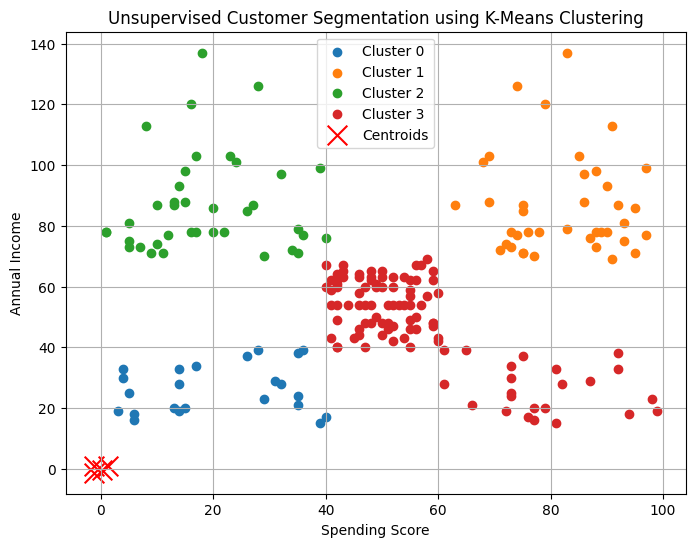

In [12]:
# Visualize customer segmentation
plt.figure(figsize=(8, 6))
for cluster_num in range(4):
    cluster_data = customer_data[customer_data['Cluster'] == cluster_num]
    plt.scatter(cluster_data['Spending Score (1-100)'], cluster_data['Annual Income (k$)'], label=f'Cluster {cluster_num}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.title('Unsupervised Customer Segmentation using K-Means Clustering')
plt.legend()
plt.grid()
plt.show()